<a name='ex-03'></a>


$$ 予測値f_{\mathbf{w},b}(x) = g(\mathbf{w}\cdot \mathbf{x} + b)$$


$$シグモイド関数g(z) = \frac{1}{1+e^{-z}}$$

$$コスト　loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$

$$ コスト関数J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} 
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) 
$$

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \newline       \; & w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1}\newline & \rbrace\end{align*}$$




    


実用プログラム

Learned weights: [-9.02347863e-05  3.41465844e-01  6.46531019e-01 -2.74419211e+00
 -9.60081505e-01 -2.38783888e+00]
Learned bias: 1.1800441572369442


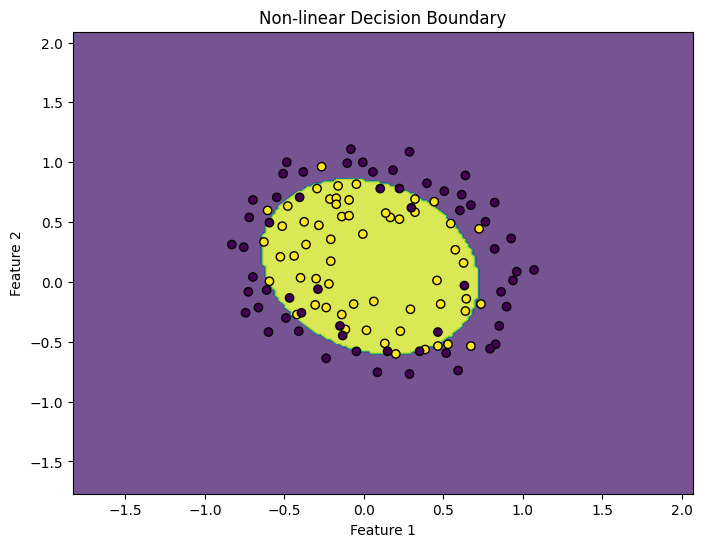

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from utils import *
import copy
import math
from sklearn.datasets import make_blobs

%matplotlib inline
# データの読み込み
data = pd.read_csv("data/ex2data4.txt")
X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values

# 特徴量を多項式変換する (例: 3次の多項式)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# ロジスティック回帰モデルの作成
model = LogisticRegression(solver='lbfgs')

# モデルの訓練
model.fit(X_train_poly, y_train)

# モデルの重みとバイアス
w = model.coef_[0]
b = model.intercept_[0]

# 結果表示
print("Learned weights:", w)
print("Learned bias:", b)

# 決定境界をプロットする
def plot_decision_boundary(X, y, model, poly):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Non-linear Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 決定境界をプロット
plot_decision_boundary(X_train, y_train, model, poly)


５クラス（Logi vs NN)

c:\Users\bsksh\Documents\programm\Python\machine learning\test\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\bsksh\Documents\programm\Python\machine learning\test\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bsksh\AppData\Local\Temp\ipykernel_3728\1177481859.py:28: MatplotlibDeprecationWarning: The get_cmap function was

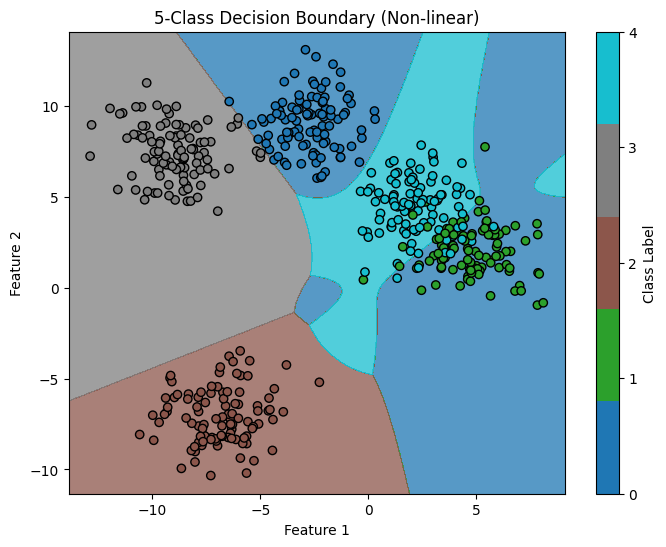

In [ ]:

# --- 5クラスのデータを blob で生成 ---
X_train, y_train = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=1.5, random_state=42)

# --- 多項式特徴量に変換（非線形境界を可能に） ---
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

# --- ロジスティック回帰（多クラス対応） ---
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_poly, y_train)

# --- 決定境界をプロットする関数 ---
def plot_decision_boundary(X, y, model, poly):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))
    plt.title('5-Class Decision Boundary (Non-linear)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(ticks=range(5), label='Class Label')
    plt.show()

# --- 実行 ---
plot_decision_boundary(X_train, y_train, model, poly)


C:\Users\bsksh\AppData\Local\Temp\ipykernel_3728\2105664254.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
C:\Users\bsksh\AppData\Local\Temp\ipykernel_3728\2105664254.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))


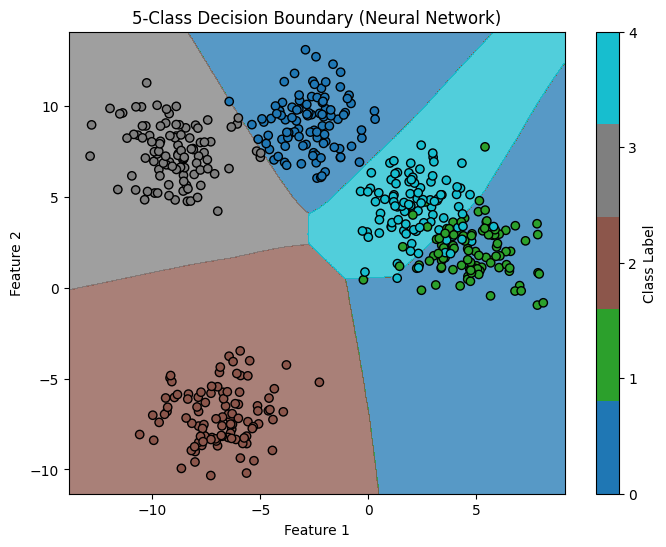

In [ ]:
# --- データ生成（5クラス） ---
X_train, y_train = make_blobs(n_samples=500, centers=5, n_features=2, cluster_std=1.5, random_state=42)

# --- 特徴量の標準化（MLPには重要） ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# --- ニューラルネット（MLP）分類器を構築 ---
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp.fit(X_scaled, y_train)

# --- 決定境界を描画する関数 ---
def plot_decision_boundary(X, y, model, scaler):
    plt.figure(figsize=(8, 6))
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_scaled = scaler.transform(X_grid)
    Z = model.predict(X_grid_scaled)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.get_cmap("tab10", 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap("tab10", 5))
    plt.title('5-Class Decision Boundary (Neural Network)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(ticks=range(5), label='Class Label')
    plt.show()

# --- 決定境界を表示 ---
plot_decision_boundary(X_train, y_train, mlp, scaler)


手動プログラム


dj_db at initial w and b (zeros):-0.10606060606060606
dj_dw at initial w and b (zeros):[-12.305388775165389, -11.770672393525663]
dj_db at test w and b: -0.6060606060597041
dj_dw at test w and b: [-45.28419557360989, -44.822061868222]
All tests passed!
Iteration    0: Cost     0.94   
Iteration 1000: Cost     0.30   
Iteration 2000: Cost     0.30   
Iteration 3000: Cost     0.30   
Iteration 4000: Cost     0.30   
Iteration 5000: Cost     0.30   
Iteration 6000: Cost     0.30   
Iteration 7000: Cost     0.30   
Iteration 8000: Cost     0.30   
Iteration 9000: Cost     0.30   
Iteration 9999: Cost     0.30   


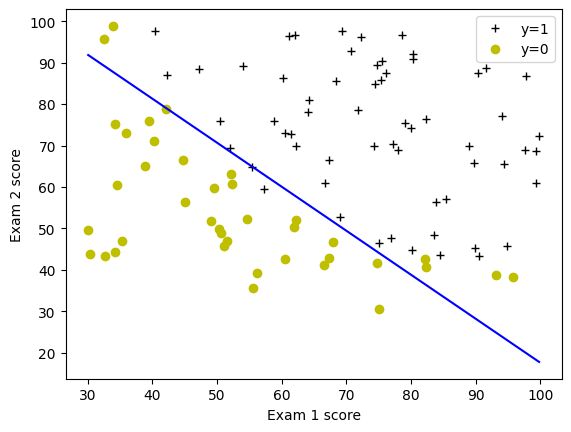

In [ ]:
def sigmoid(z):

    g = 1/(1+np.exp(-z))
   
    return g


def compute_cost(X, y, w, b, *argv):

    m, n = X.shape

    z = np.dot(X, w) + b          # z = (m,)
    y_hat = 1 / (1 + np.exp(-z))  # y = (m,)
    cost = -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)  #cost = (m,)
    total_cost = (1 / m) * np.sum(cost)  # (1,)

    return total_cost

m, n = X_train.shape

def compute_gradient(X, y, w, b, *argv): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]  # 特徴量 x 重み
        z_wb += b                  # バイアスを加える
        f_wb = 1 / (1 + np.exp(-z_wb))  # シグモイド関数
        
        dj_db_i = f_wb - y[i]       # 偏微分：バイアス方向
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] += dj_db_i * X[i, j]  # 偏微分：各特徴量方向

    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

initial_w = np.zeros(n) #(0, 0, 0,)
initial_b = 0.


dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

# Compute and display cost and gradient with non-zero w and b
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test w and b:', dj_db)
print('dj_dw at test w and b:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 

    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)
plot_decision_boundary(w, b, X_train, y_train)
# Set the y-axis label
plt.ylabel('Exam 2 score') 
# Set the x-axis label
plt.xlabel('Exam 1 score') 
plt.legend(loc="upper right")
plt.show()


In [ ]:

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters w
    """
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]
        
        z_wb += b
        
        f_wb = 1 / (1 + np.exp(-z_wb))  # シグモイド関数
        
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    ### END CODE HERE ### 
    
    return p

# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

# load dataset
X_train, y_train = load_data("data/ex2data4.txt")

# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # 正則化項 (L2正則化)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    
    total_cost = cost_without_reg + reg_cost

    return total_cost

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    dj_dw = dj_dw + (lambda_ / m) * w
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))


Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!
Train Accuracy: 60.000000
X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>
The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


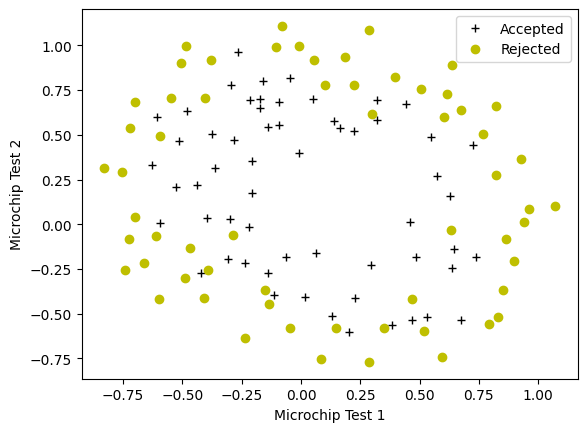

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)
X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]
Regularized cost : 0.6618252552483951
All tests passed!
dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280124, 0.0536273463274574, 0.003140278267313462]
All tests passed!
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
It

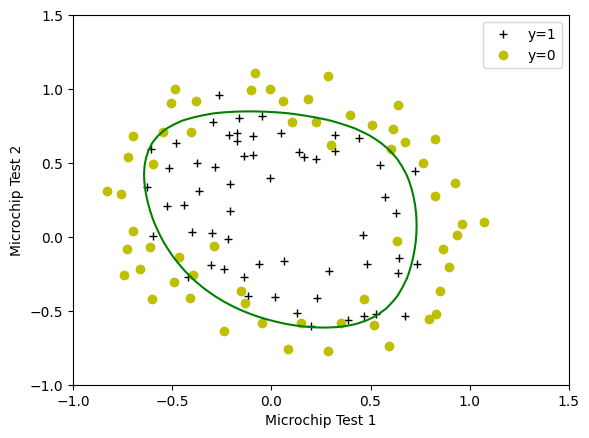

Train Accuracy: 82.203390


In [31]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters w
    """
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]
        
        z_wb += b
        
        f_wb = 1 / (1 + np.exp(-z_wb))  # シグモイド関数
        
        if f_wb >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    ### END CODE HERE ### 
    
    return p

# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

# load dataset
X_train, y_train = load_data("data/ex2data4.txt")

# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # 正則化項 (L2正則化)
    reg_cost = (lambda_ / (2 * m)) * np.sum(w**2)
    
    total_cost = cost_without_reg + reg_cost

    return total_cost

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    dj_dw = dj_dw + (lambda_ / m) * w
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01    

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))
